In [1]:
!conda info --envs

# conda environments:
#
base                     C:\Users\armin\anaconda3
CCGG                  *  C:\Users\armin\anaconda3\envs\CCGG
CCGG_backup              C:\Users\armin\anaconda3\envs\CCGG_backup



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import interpolate
import pandas as pd
import os
import emcee
import corner
from getdist import plots, gaussian_mixtures, MCSamples
import time

from CCGG_classes import Data, AXIS_interval, AXIS, FLEQ, MDLS

# Data

In [3]:
dataset = Data()

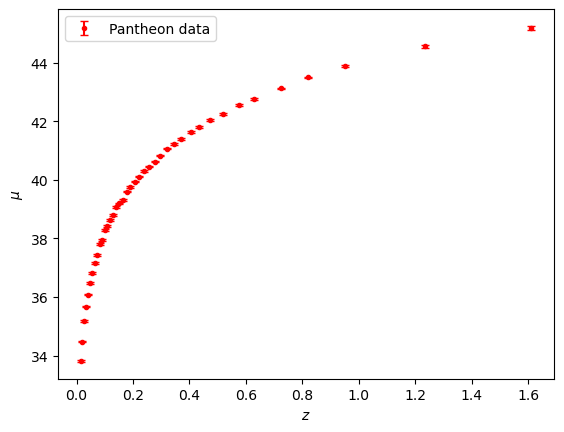

In [4]:
dataset.plot_SNe_Data()

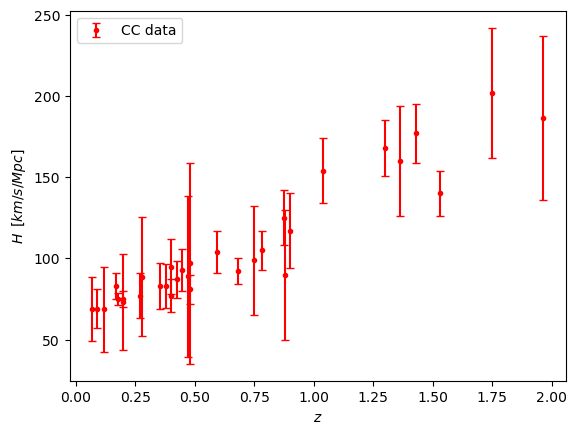

In [5]:
dataset.plot_CC_Data()

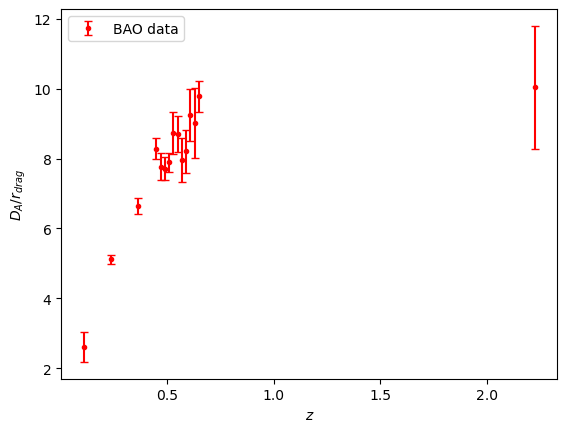

In [6]:
dataset.plot_BAO_Data()

In [7]:
dataset.print_CMB_Data()

CMB redshift = 1089
R = 1.7661
la = 301.7293
Covariance matrix = [[ 0.00033484 -0.00044417]
 [-0.00044417  0.04245662]]


In [8]:
dataset.print_BBN_Data()

BBN redshift = 1000000000
Hubble parameter at BBN = 4.76589971472913e+17


# Numerical Solution

In [9]:
#def quad_interpol(x, y, xi):
#    xx0 = xi-x[0];   xx1 = xi-x[1];   xx2 = xi-x[2]
#    x01 = x[0]-x[1]; x02 = x[0]-x[2]; x12 = x[1]-x[2]
#    return y[0]*xx1*xx2/(x01*x02)-y[1]*xx0*xx2/(x01*x12)+y[2]*xx0*xx1/(x02*x12)

In [10]:
def calc_mcmc_input(MD, *args):
    if MD.GR_asym == 'n':
        prm  = args
    else:
        Og   = MD.Ol_GR*(3-5*args[5])/(1-args[5])**2/2   # Og
        s1   = np.sqrt(2*MD.Ol_GR/(1-args[5]))           # s1
        prm  = [args[0], args[1], 0.0, args[3], args[4], args[5], Og, s1]
    
    MD.FL.set_prm(*prm)
    MD.FL.solve_FLeq()
    MD.calc_mu()
    MD.calc_R_la()
    return MD.z, MD.mu, MD.R, MD.la

In [11]:
# -------------------------------
# --- Initialization ------------
# -------------------------------
# t - axis 
nsp  = 1000      # number of sampling points per interval t_iv[i]
t_iv = []
t_iv.append([-0.5, 0.3, 8000]) #change last value
t_iv.append([ 0.3, 0.5, nsp])
t_iv.append([ 0.5, 1.0, nsp])
AX = AXIS(t_iv)

GR      = 'n'     # GR='y': Einstein, GR='n': CCGG
GR_asym = 'y'     # if CCGG: 'y' = calculation with GR-asymptotic, 'n' = else
Ol_GR   = 0.685   # relevant only if GR_asym = 'y'

In [12]:
# -------------------------------
# --- Calculation ---------------
# -------------------------------
FL = FLEQ(GR, AX)
MD = MDLS(FL, GR_asym, Ol_GR)

#          Om,    Orad,    Ol,     Ok,    h,     Os      Og     s1      !!!! for test purpose only
args  = (0.315, 5.44e-5, 0.685,  0.000, 0.674, 0.900, -1.000, 0.500)
#args  = (0.315, 5.44e-5, 1.013,  0.000, 0.674, 2.700, -1.000, 0.500)
starttime = time.time()
z, mu, R, la = calc_mcmc_input(MD, *args)
elapsedtime = time.time()-starttime
print('\n elapsed time [sec] = ', elapsedtime)

[3.04515403e+06 4.38272506e+05 2.17405406e+02]
[3.28390506e-07 2.28168024e-06 4.57864125e-03]
 ntr,z[ntr-1:ntr+2],ztr:  2888 [1.12660277e+02 2.17405406e+02 4.38272506e+05] 1089
 rcd[ntr-1:ntr+2],rtrq,rtrl:  [1.33634975e+42 1.34866337e+42 1.25296135e+43] 1.3709100096004724e+42

 elapsed time [sec] =  0.5665798187255859



 --- Cosmological parameters ---------------------
 Ω_m                  =   3.150e-01  []
 Ω_r                  =   5.440e-05  []
 Ω_Λ                  =   0.000e+00  []
 Ω_K                  =   0.000e+00  []
 h                    =   6.740e-01  []
 Ω_s                  =   9.000e-01  []
 Ω_g                  =  -5.138e+01  []
 s(τ=1)               =   3.701e+00  []
 Σ(τ=1)               =   5.884e-01  []
 -------------------------------------------------

 --- Results -------------------------------------
 zmin                 =   0.000e+00  []
 zmax                 =   3.045e+06  []
 z(transparency)      =   1.089e+03  []
 r(transparency)      =   1.371e+42  []
 H(zmin)              =   1.000e+00  []
 H(zmax)              =  -2.166e+15  []
 r_sound              =   3.219e+42  []
 R                    =   1.106e+00  []
 R(Planck)            =   1.766e+00  []
 la                   =   1.338e+00  []
 la(Planck)           =   3.017e+02  []
 --------------------------------------------

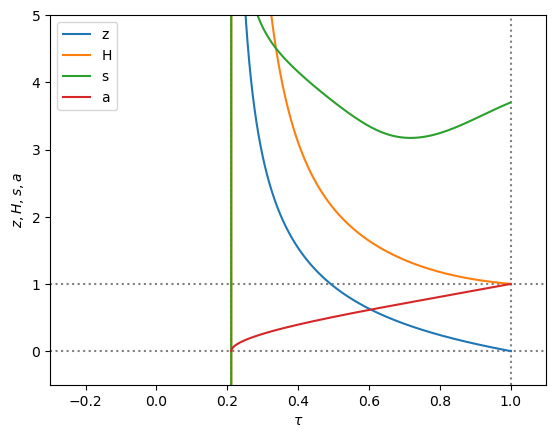

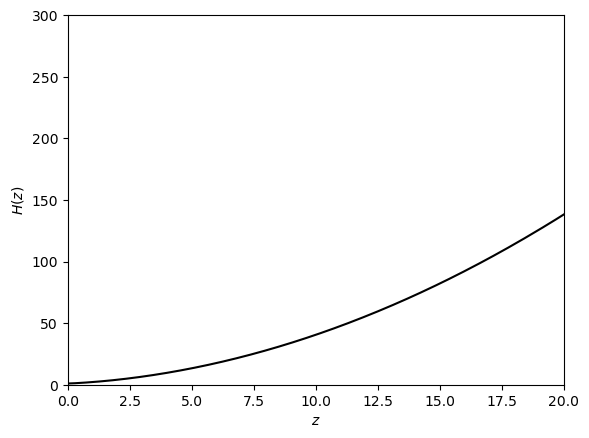

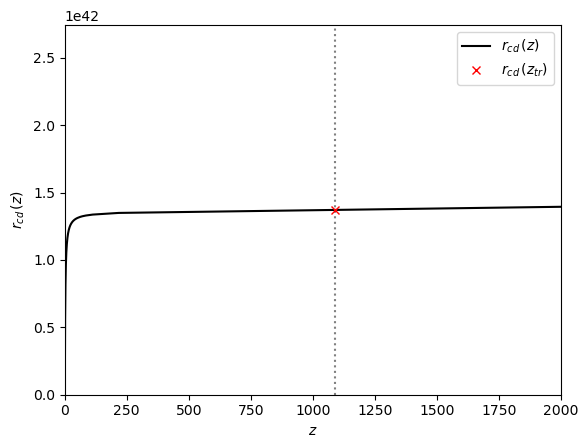

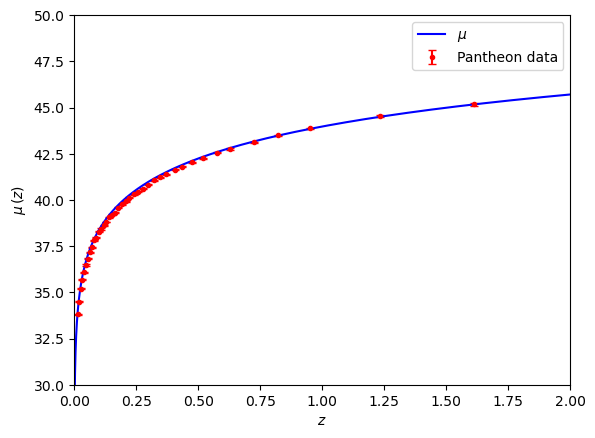

In [13]:
# -------------------------------
# --- Output for test data ------
# -------------------------------
FL.print_parameters()
MD.print_results()

xmin = -0.3; xmax = 1.1; ymin = -5.e-1; ymax = 5.e0
FL.draw_zHs(xmin, xmax, ymin, ymax)

#xmin = 0; xmax = MD.z[-1]*1.1; ymin = min(MD.Hz)*0.9; ymax = max(MD.Hz)*1.1
xmin = 0; xmax = 20; ymin = 0; ymax = 300
MD.draw_H(xmin, xmax, ymin, ymax)

xmin = 0; xmax = 2000; ymin = 0; ymax = 2*MD.rtr
MD.draw_rcd(xmin, xmax, ymin, ymax)

xmin = 0; xmax = 2; ymin = 30; ymax = 50
MD.draw_mu(xmin, xmax, ymin, ymax, dataset.SNe_redshift, dataset.distmod, dataset.distmod_unc)

# MCMC

In [14]:
#Set parameter vals for known:
Oradiation = 5.44e-5
Ok_planck = 0.0
#Om_planck = 0.315

In [15]:
# Define the log_likelihood functions
def log_likelihood_SNe(params):
    Om, Os = params
    args  = (Om, 5.44e-5, 0.685,  Ok_planck, 0.674, Os, -1.000, 0.500)
    #args = (Om, Oradiation, 1.013, Ok_planck, 0.674, Os, -1.000, 0.500) #1.013->0
    z, mu, R, la = calc_mcmc_input(MD, *args)
    f = interpolate.interp1d(z, mu, kind = 'linear')
    print('Os =', Os)
    print('z =', z)
    #x = np.linspace(0,2,500)
    #plt.figure()
    #plt.plot(x,f(x))
    #plt.show()
    return -0.5*np.sum(((dataset.distmod.values - f(dataset.SNe_redshift.values))/dataset.distmod_unc.values)**2 + np.log(2*np.pi*dataset.distmod_unc.values**2))

In [16]:
#X = log_likelihood_SNe([0.3,3.09])
X = log_likelihood_SNe([0.3,0.9])

[2.76564956e+17 1.77006507e+09 3.18315423e+02]
[3.61578709e-18 5.64950983e-10 3.13169965e-03]
 ntr,z[ntr-1:ntr+2],ztr:  2950 [1.24601473e+02 3.18315423e+02 1.77006507e+09] 1089
 rcd[ntr-1:ntr+2],rtrq,rtrl:  [1.35225513e+42 1.36944528e+42 2.23907225e+46] 1.3791935847913889e+42
Os = 0.9
z = [0.00000000e+00 5.00185111e-04 1.00074089e-03 ... 3.18315423e+02
 1.77006507e+09 2.76564956e+17]


In [17]:
Ommin = 0.3
Ommax = 0.4
#Okmin =-0.01
#Okmax = 0.01
Osmin = 0.8
Osmax = 1.2 #around 0.5, try Omega_l = 0.685

# Uniform log_prior
def log_prior(params):
    Om, Os = params
    if Ommin <= Om <= Ommax and Osmin <= Os <= Osmax:
        return -np.log((Ommax - Ommin)*(Osmax - Osmin))
    return -np.inf
    #Om, Ok, Os = params
    #if Ommin <= Om <= Ommax and Okmin <= Ok <= Okmax and Osmin <= Os <= Osmax:
    #    return -np.log((Ommax - Ommin)*(Okmax - Okmin)*(Osmax - Osmin))
    #return -np.inf

In [18]:
#Product, resp. sum in logarithm form of likelihood and prior
def log_sum(params):
    # Compute the log-prior
    lp = log_prior(params)
    if lp == -np.inf:
        # If the prior is zero (i.e. log is -infinity), return negative infinity
        return -np.inf
    
    # Compute the log-likelihood
    lSNe = log_likelihood_SNe(params)
    #lCC = log_likelihood_CC(params)
    #lBB = log_likelihood_BBN(params)
    #lCMB = log_likelihood_CMB(params)
    #lBAO = ......
    
    # Compute the log-posterior as the sum of the log-prior and log-likelihood
    return lp + lSNe

In [19]:
# Set the number of dimensions (i.e. the number of parameters)
#ndim = 3
ndim = 2

# Set the number of walkers
#nwalker = 9
nwalkers = 6

# Define the range of values for each parameter
#theta_min = [Ommin, Okmin, Osmin]
#theta_max = [Ommax, Okmax, Osmax]
theta_min = [Ommin, Osmin]
theta_max = [Ommax, Osmax]


# Generate random starting positions for the walkers within the defined range
p0 = np.zeros((nwalkers, ndim))
for i in range(ndim):
    p0[:, i] = np.random.uniform(theta_min[i], theta_max[i], size=nwalkers) 

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_sum, args=())

In [20]:
# Run the sampler for a specified number of iterations
n_iterations = 1000
sampler.run_mcmc(p0, n_iterations, progress=True)

[3.70027630e+18 5.09874125e+03 1.47389632e+02]
[2.70250089e-19 1.96088380e-04 6.73901530e-03]
 ntr,z[ntr-1:ntr+2],ztr:  2464 [  89.55723295  147.389632   5098.74125163] 1089
 rcd[ntr-1:ntr+2],rtrq,rtrl:  [1.19101037e+42 1.19967701e+42 1.40330151e+42] 1.238400763780097e+42
Os = 0.8214958928470322
z = [0.00000000e+00 5.00184738e-04 1.00073940e-03 ... 1.47389632e+02
 5.09874125e+03 3.70027630e+18]
[1294.4462154   165.47325678  108.38498261]
[0.00077193 0.00600697 0.00914202]
 ntr,z[ntr-1:ntr+2],ztr:  3014 [ 108.38498261  165.47325678 1294.4462154 ] 1089
 rcd[ntr-1:ntr+2],rtrq,rtrl:  [1.40473029e+42 1.41463161e+42 1.47595659e+42] 1.464796905885305e+42
Os = 0.9238871481788443
z = [0.00000000e+00 5.00181905e-04 1.00072811e-03 ... 1.08384983e+02
 1.65473257e+02 1.29444622e+03]
[434.75631178 120.01309287  83.29395747]
[0.00229486 0.00826357 0.01186325]
Os = 0.8430947036929597
z = [0.00000000e+00 5.00183610e-04 1.00073489e-03 ... 8.32939575e+01
 1.20013093e+02 4.34756312e+02]


C:\Users\armin\AppData\Local\Temp\ipykernel_3672\2095165927.py:6: RuntimeWarning: invalid value encountered in sqrt
  s1   = np.sqrt(2*MD.Ol_GR/(1-args[5]))           # s1


[0.]
[1.]
Os = 1.0991664463918676
z = [0.]
emcee: Exception while calling your likelihood function:
  params: [0.331491   1.09916645]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "C:\Users\armin\anaconda3\envs\CCGG\Lib\site-packages\emcee\ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\armin\AppData\Local\Temp\ipykernel_3672\2422246814.py", line 10, in log_sum
    lSNe = log_likelihood_SNe(params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\armin\AppData\Local\Temp\ipykernel_3672\427315017.py", line 14, in log_likelihood_SNe
    return -0.5*np.sum(((dataset.distmod.values - f(dataset.SNe_redshift.values))/dataset.distmod_unc.values)**2 + np.log(2*np.pi*dataset.distmod_unc.values**2))
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\armin\anaconda3\envs\CCGG\Lib\site-packages\scipy\interpolate\_polyint.py", line 81, in __call__
    y = self._evaluate(x)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\armin\anaconda3\envs\CCGG\Lib\site-packages\scipy\interpolate\_inter

ValueError: A value (0.014) in x_new is above the interpolation range's maximum value (0.0).

In [ ]:
# Get the chain of samples produced by the sampler
#samples = sampler.chain[:, :, :].reshape((-1, ndim))
samples = sampler.chain[:, :, :]
print(sampler.chain[:,:,:].shape)

# Discard the first few samples as burn-in
burnin = 100
final_samples = samples[:,burnin:, :]
print(final_samples.shape)

In [ ]:
# Flatten the chain of samples
flat_samples = final_samples.reshape(-1, ndim)
print(flat_samples.shape)

# Plot the corner plot using the flattened samples
figure = corner.corner(flat_samples,bins=50, labels=['$\Omega_s$'])

# Show the plot
plt.show()

In [ ]:
names = ['Omega_m','Omega_k','Omega_s']
labels =  ['\Omega_m','\Omega_k','\Omega_s']
samples_new = MCSamples(samples=np.array(flat_samples),names=names,labels=labels)
g = plots.get_subplot_plotter()
g.triangle_plot(samples_new, filled=True)

In [ ]:
#mean and std dev of Om_m
m1 = np.mean(flat_samples[:,0])
std1 = np.std(flat_samples[:,0])
print('Mean of Om_m = ',m1)
print('Std dev of Om_m = ',std1)

#mean and std dev of Om_k
m2 = np.mean(flat_samples[:,1])
std2 = np.std(flat_samples[:,1])
print('Mean of Om_k = ',m2)
print('Std dev of Om_k = ',std2)

#mean and std dev of Om_s
m3 = np.mean(flat_samples[:,2])
std3 = np.std(flat_samples[:,2])
print('Mean of Om_s = ',m3)
print('Std dev of Om_s = ',std3)

In [ ]:
#Best fit
#args  = (0.315, 5.44e-5, 1.013,  0.000, 0.674, 2.700, -1.000, 0.500)
print(m1,m2,m3)
#args = (0.315, Oradiation, 0.685,  0, 0.674, 0.5,-1.000, 0.500)
args  = (m1, 5.44e-5, 1.013,  m2, 0.674, m3, -1.000, 0.500)
#AX, y0, y, yp, nz, z, Hz, di, mu, zt, rcd, mu_s = prepare_solving()
calc_mus(GR, AX, y0, y, yp, zt, Hz, zs, di, mu, *args)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0.01, 2)
ax.set_ylim(32, 46)
plt.errorbar(redshift, distmod, yerr=distmod_unc, capsize=3, fmt='r.', label='Pantheon data')
plt.plot(z,mu,label='fit')
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.legend()
plt.show()